In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Basic Graph

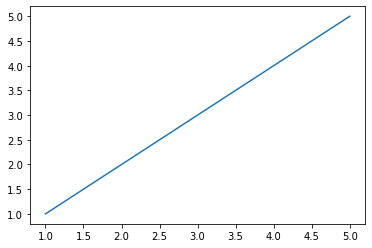

In [2]:
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]

plt.plot(x, y)
plt.show()

## Styling

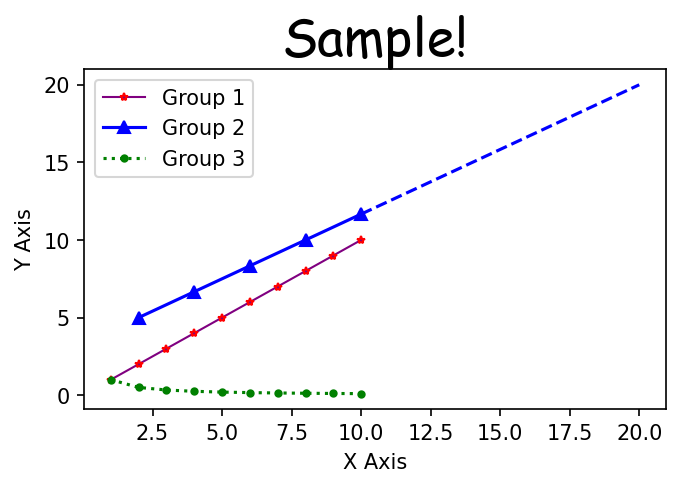

In [3]:
plt.figure(figsize=(5, 3), dpi=150) # full size will be x*dpi + y*dpi

x1 = np.linspace(1, 10, num=10)
y1 = np.linspace(1, 10, num=10)

x2 = np.linspace(2, 20, num=10)
y2 = np.linspace(5, 20, num=10)

# Plot first group
plt.plot(x1, y1, label='Group 1',
         color='purple',
         linewidth=1,
         marker='*',
         markersize=4,
         markeredgecolor='red',
         linestyle='-')

# Plot a second group and use shortcut for styling
plt.plot(x2[:5], y2[:5], 'b^-', label='Group 2')
# Using same values to show dashed line, useful to show projections
plt.plot(x2[4:], y2[4:], 'b--')

# Plot another item
plt.plot(x1, x1**-1, 'g.:', label='Group 3')

# Set graph title
plt.title('Sample!', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 25})

# Set axis names
plt.ylabel('Y Axis')
plt.xlabel('X Axis')

# Show legend
plt.legend()

# Show graph
plt.show()

## Bar Chart

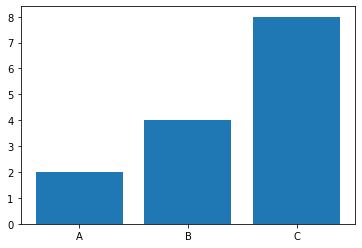

In [4]:
labels = ['A', 'B', 'C']
values = [2, 4, 8]

bars = plt.bar(labels, values)
plt.show()

**Styling bar charts**

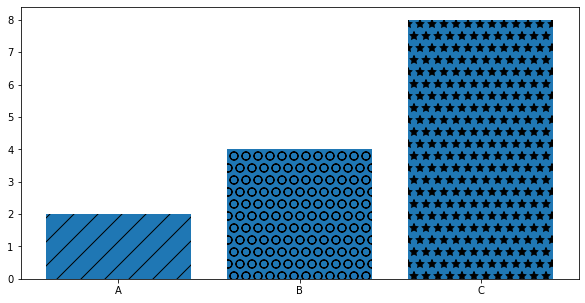

In [5]:
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, values)
bars[0].set_hatch('/')
bars[1].set_hatch('O')
bars[2].set_hatch('*')
plt.show()

## Real World Example 1

In [6]:
gas = pd.read_csv('https://github.com/KeithGalli/matplotlib_tutorial/raw/master/gas_prices.csv', index_col='Year')

In [7]:
gas.head()

,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
Year,,,,,,,,,,
1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


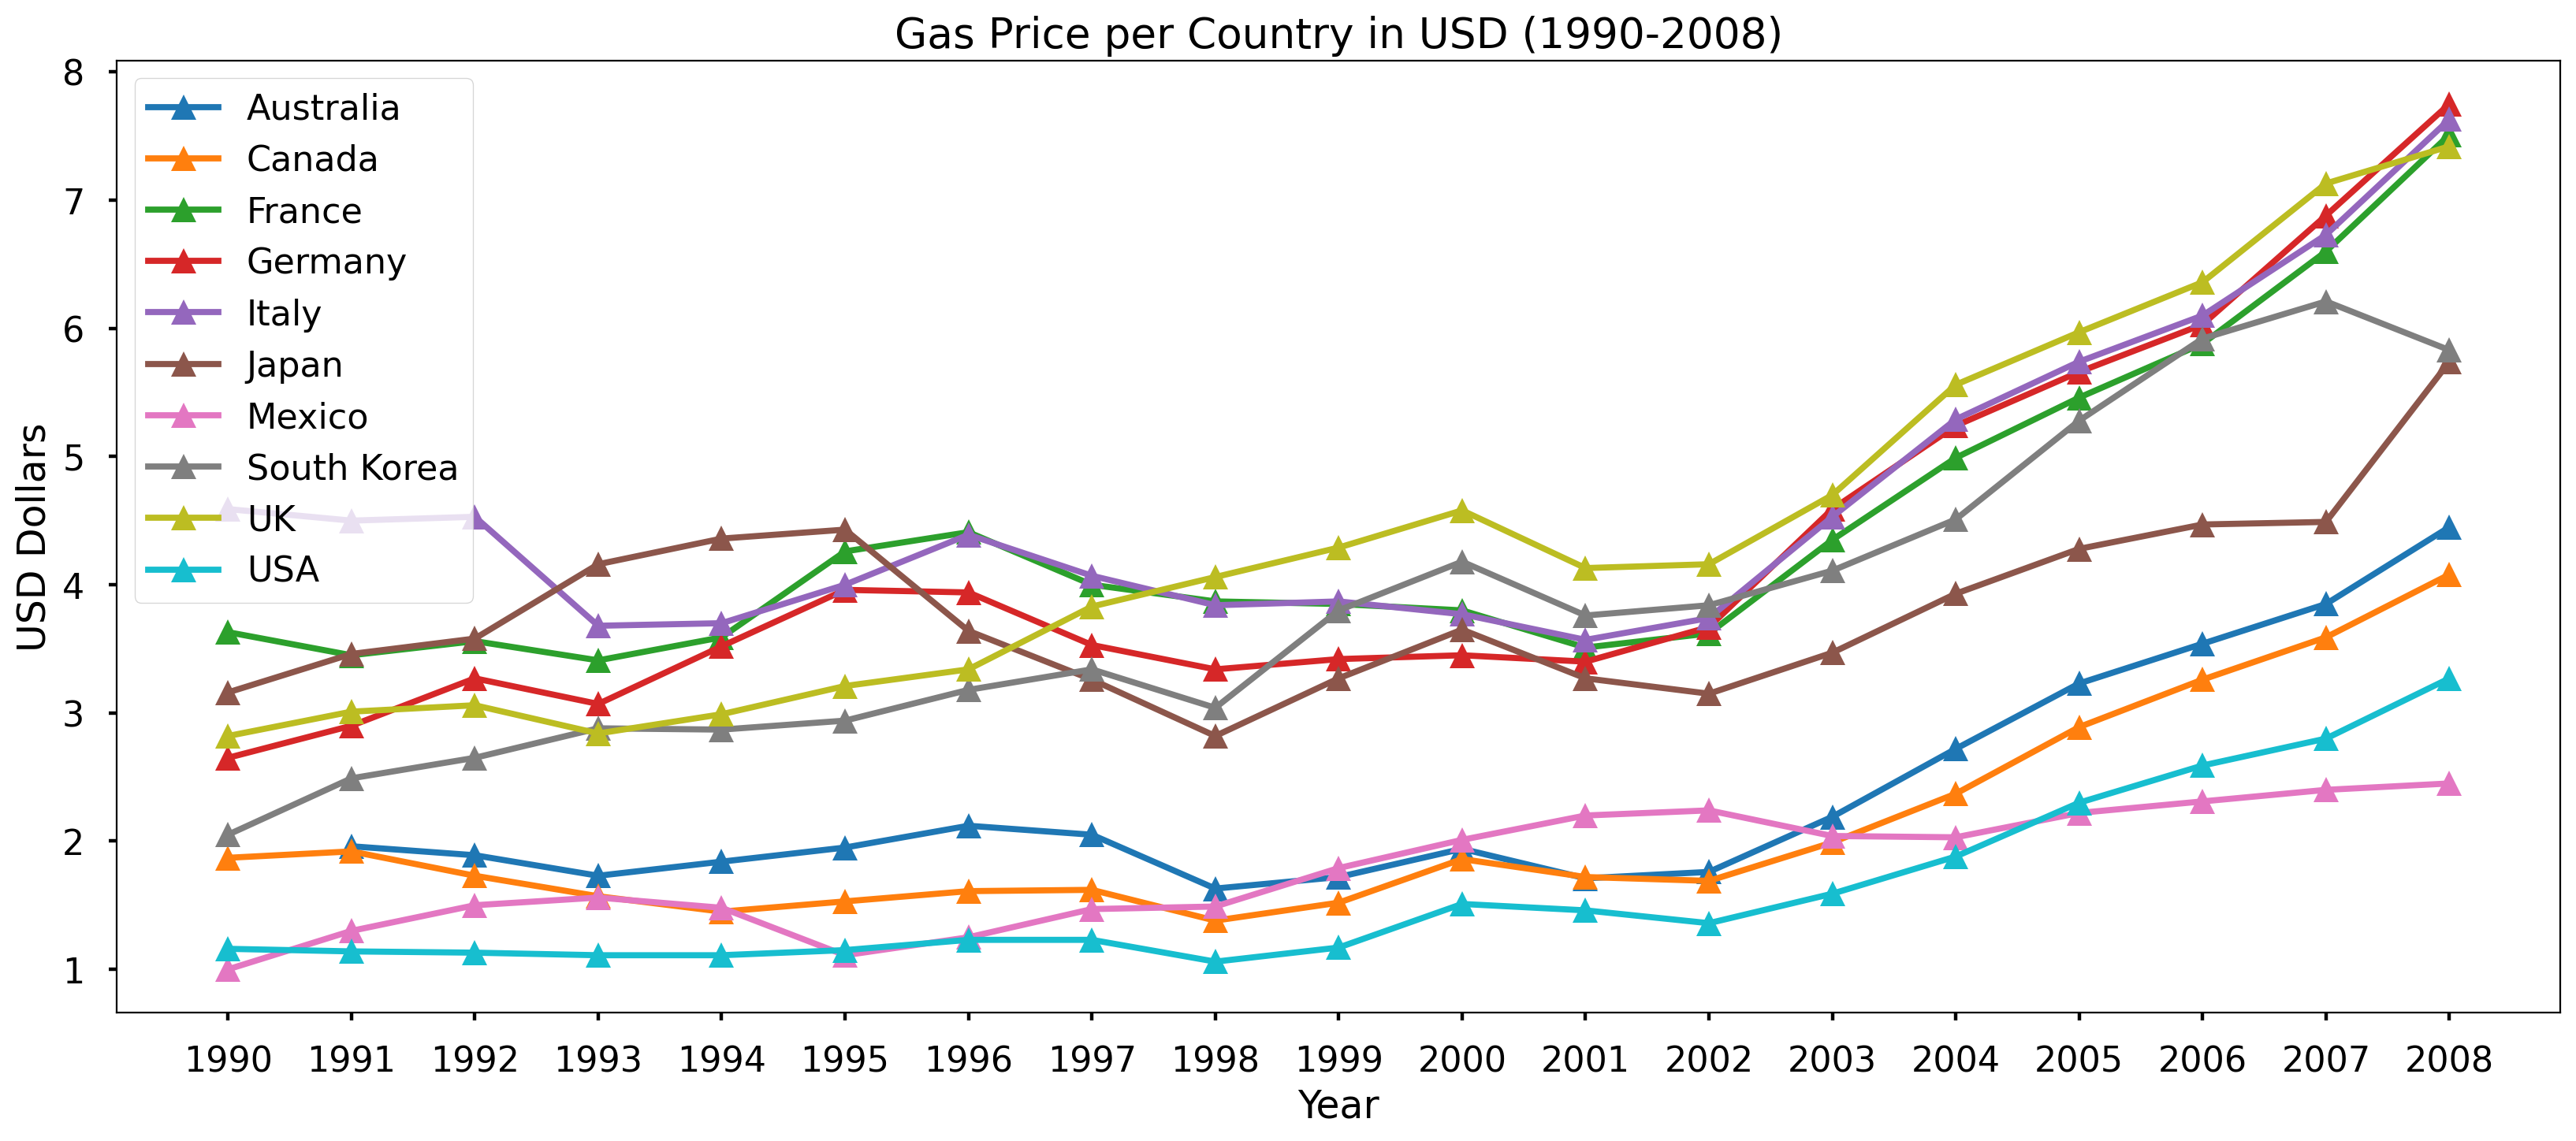

In [8]:
plt.style.use(['seaborn-poster'])
plt.figure(figsize=(20, 8), dpi=200)

for country in gas.columns.tolist():
    plt.plot(gas.index, gas[country], label=country, marker='^')

plt.title(f'Gas Price per Country in USD ({gas.index.min()}-{gas.index.max()})')
plt.xlabel('Year')
plt.ylabel('USD Dollars')
plt.xticks(gas.index)
plt.legend(loc='upper left')

plt.show()

## Histograms

In [9]:
fifa = pd.read_csv('https://github.com/KeithGalli/matplotlib_tutorial/raw/master/fifa_data.csv', index_col=0)
fifa.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


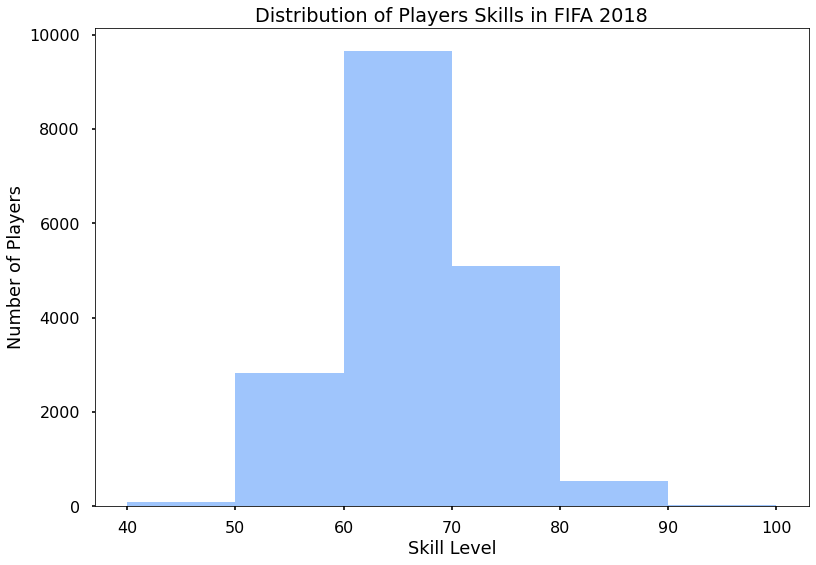

In [10]:
bins = np.arange(40, 110, 10)

plt.hist(fifa.Overall, bins=bins, color='#9fc5fc')
plt.title('Distribution of Players Skills in FIFA 2018')
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.show()

## Pie Chart

In [11]:
prefered_foot = fifa['Preferred Foot'].value_counts()
prefered_foot = (prefered_foot/prefered_foot.sum())*100
prefered_foot

Right    76.810397
Left     23.189603
Name: Preferred Foot, dtype: float64

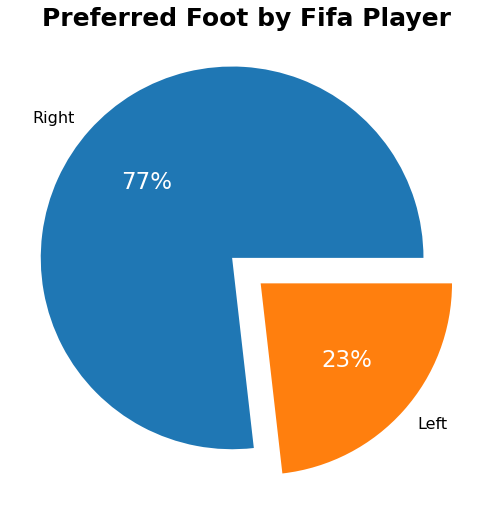

In [12]:
explode = [.1, .1]

wedges, texts, autotexts = plt.pie(prefered_foot, labels=prefered_foot.index, autopct='%.0f%%', explode=explode)

plt.setp(autotexts, size=23, color="w")
plt.title(
    'Preferred Foot by Fifa Player',
    fontdict={'fontsize': 25, 'fontweight': 'bold'})
plt.show()

## Box Chart

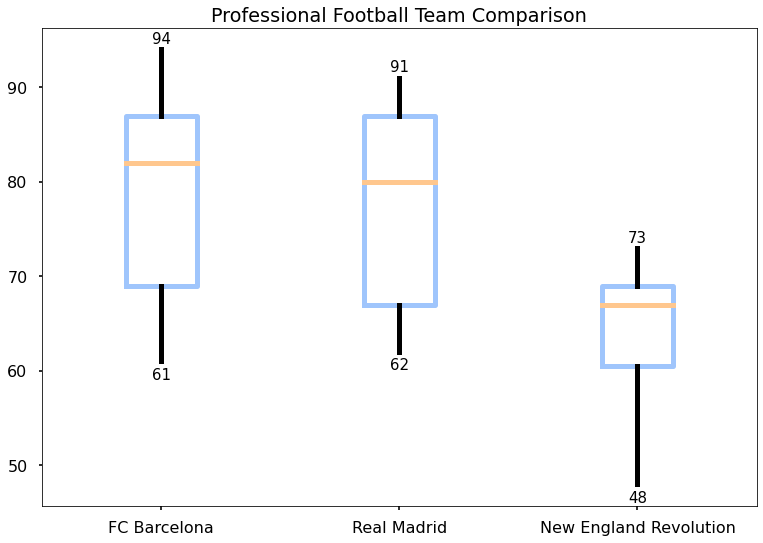

In [13]:
teams = ['FC Barcelona', 'Real Madrid', 'New England Revolution']

overalls = []
for team in teams:
    data = fifa.loc[fifa.Club == team]['Overall']
    overalls.append(data)

boxes = plt.boxplot(
    overalls,
    labels=teams,
    showcaps=False)
    
for index, data in enumerate(overalls):
    plt.text(
        index+0.96,
        data.max()+1.1,
        data.max(),
        verticalalignment='center',
        horizontalalignment='left',
        fontsize=15)

    plt.text(
        index+0.96,
        data.min()-1.4,
        data.min(),
        verticalalignment='center',
        horizontalalignment='left',
        fontsize=15)

for median in boxes['medians']:
    median.set_color('#ffc78e')
    median.set_linewidth(5)

for whisker in boxes['whiskers']:
    whisker.set_color('k')
    whisker.set_linewidth(5)

for box in boxes['boxes']:
    box.set_color('#9fc5fc')
    box.set_linewidth(5)

plt.title('Professional Football Team Comparison')

plt.show()